In [18]:
import pandas as pd
import numpy as np
import os
import pydotplus
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Image

In [19]:
pwd

u'/Users/maisha/Documents/ML_Nepal'

In [20]:
ls

01DataMunging.ipynb
03ChickenpoxMumpsForests.ipynb
Data/
DownloadData.py
MaishaLopa_WorkSample_PythonScript (1).ipynb
MaishaLopa_WorkSample_PythonScript.ipynb
README.md
blah.docx
feature_exploration_kk.ipynb
master_updated.csv
nepal_communicable_diseases_csv.csv


In [21]:
data = pd.read_csv('master_updated.csv',index_col='Unnamed: 0')
data.head()

,Foreigner,Hill Brahman,Hill Chhetree,Hill Dalit,Madhesi Brahman/Chhetree,Madhesi Dalit,Madhesi Other - OC A,Madhesi Other - OC B,Mtn/Hill Janajati A,Mtn/Hill Janajati B,...,Tetanus,Tuberculosis,Whooping cough,Alcoholism,Anxiety (Neurosis,Conversive disorder (Hysteria),Depression,Epilesy,Mental retardation,Psychosis
Achham,0.000000,0.102036,0.581749,0.135158,0.000101,0.000000,0.004921,0.0,0.006921,0.002637,...,0.000000,0.000241,0.000062,0.000035,0.001208,0.000151,0.001480,0.000419,0.000019,0.000140
Arghakhanchi,0.000000,0.327665,0.193248,0.209020,0.001604,0.000066,0.001058,0.0,0.193349,0.034726,...,0.000000,0.000238,0.000000,0.000283,0.001933,0.000162,0.001351,0.000101,0.000035,0.000334
Baglung,0.000045,0.195385,0.205601,0.263230,0.001165,0.000000,0.000927,0.0,0.308176,0.009564,...,0.000015,0.000149,0.000000,0.000380,0.002211,0.000168,0.001124,0.000320,0.000376,0.000484
Baitadi,0.000052,0.185498,0.603899,0.083153,0.001610,0.000128,0.052499,0.0,0.003870,0.000618,...,0.000024,0.000562,0.000004,0.000203,0.000526,0.000060,0.000514,0.000020,0.000175,0.000104
Bajhang,0.000077,0.101953,0.726490,0.113103,0.000497,0.000102,0.000277,0.0,0.002055,0.001394,...,0.000005,0.000461,0.000020,0.000102,0.001261,0.000174,0.000856,0.000133,0.000036,0.000231


In [22]:
for i in enumerate(data.columns):
    print i

(0, 'Foreigner')
(1, 'Hill Brahman')
(2, 'Hill Chhetree')
(3, 'Hill Dalit')
(4, 'Madhesi Brahman/Chhetree')
(5, 'Madhesi Dalit')
(6, 'Madhesi Other - OC A')
(7, 'Madhesi Other - OC B')
(8, 'Mtn/Hill Janajati A')
(9, 'Mtn/Hill Janajati B')
(10, 'Musalman')
(11, 'Newar')
(12, 'Other (MPB)')
(13, 'Other undefined')
(14, 'Tarai Janajati')
(15, 'Total Pop Census')
(16, 'Poverty Gap')
(17, 'Poverty Incidence')
(18, 'Poverty Severity')
(19, 'Adult illiteracy rate')
(20, 'Deprivation in economic provisioning')
(21, 'HPI')
(22, 'People not expected to survive age 40')
(23, 'Children <5 years malnourished')
(24, 'Without safe water')
(25, 'BCG3')
(26, 'DPT-HepB 1 3')
(27, 'DPT-HepB 2 3')
(28, 'DPT-HepB 3 3')
(29, 'Japenese Encephalitis 3')
(30, 'Measles 12-23 3')
(31, 'Measles 9-11 months 3')
(32, 'Polio13')
(33, 'Polio23')
(34, 'Polio33')
(35, 'TT 1 3')
(36, 'TT 2+ 3')
(37, 'TT23')
(38, 'Sanitation Coverage (%')
(39, 'Water Coverage Supply (%)')
(40, 'HDI ')
(41, 'Sex Ratio (male per 100 female

### Chicken Pox

#### Decision Tree 

In [27]:
drop_cols = ['Total Pop Census', 'People not expected to survive age 40']

In [28]:
# X_novacc = df.iloc[:, range(25) + range(38, 42)].drop(drop_cols, axis=1)
X = data.iloc[:,range (46) + range(48,63)].drop(drop_cols, axis=1) #all columns 
Y = data['Chicken pox'] #target 

Best parameters found by grid search:
{'max_depth': 2}
Best DT score:
-1.5155759415


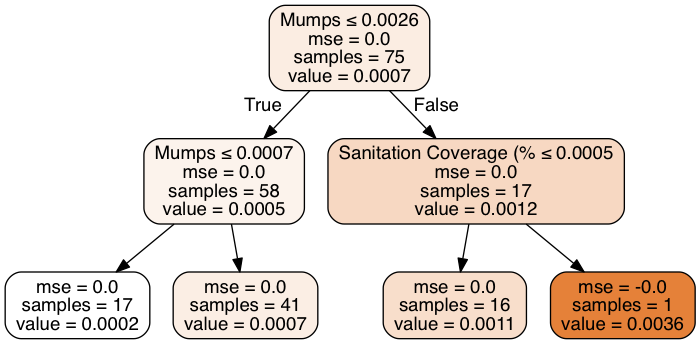

In [30]:
param_grid = {'max_depth' : range(2, 20)}
dt_model = GridSearchCV(tree.DecisionTreeRegressor(random_state=345), param_grid)
dt_model = dt_model.fit(X,Y)
print("Best parameters found by grid search:")
print(dt_model.best_params_)
print("Best DT score:")
print(dt_model.best_score_)

dot_data = tree.export_graphviz(dt_model.best_estimator_,feature_names=X.columns, out_file=None, filled=True, rounded=True, special_characters=True,)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=500)

#### Random Forest Model 

In [31]:
rf = RandomForestRegressor(random_state=345)
rf_model = rf.fit(X,Y)
pred = rf_model.predict(X)
score = rf_model.score(X, Y)
print score

features = filter(lambda x: x[1] > 0, sorted(zip(X.columns, rf_model.feature_importances_), 
                                             key=lambda x: x[1], reverse=True))
feature_cols = map(lambda x: x[0], features)
features

0.714583341131


[('Mumps', 0.18102990236647024),
 ('Sanitation Coverage (%', 0.15307646146397128),
 ('Children <5 years malnourished', 0.13129191335085003),
 ('Madhesi Other - OC A', 0.10475772126478249),
 ('Anxiety (Neurosis', 0.074740130709054081),
 ('Hepatatis-B', 0.058501499503994615),
 ('Mtn/Hill Janajati A', 0.050312680378081939),
 ('Madhesi Dalit', 0.037900064349358761),
 ('Adult illiteracy rate', 0.036598012513054182),
 ('Tuberculosis', 0.026830498821945058),
 ('Epilesy', 0.02186433150147182),
 ('Without safe water', 0.020908551232067942),
 ('Madhesi Brahman/Chhetree', 0.01621735043048737),
 ('HDI ', 0.014033701783427582),
 ('STD/STI3', 0.013511288628556625),
 ('Alcoholism', 0.013117773847061882),
 ('TT23', 0.012577643604533204),
 ('Measles', 0.012344246501155983),
 ('Mtn/Hill Janajati B', 0.0057694546238764837),
 ('DPT-HepB 1 3', 0.0041210581040410556),
 ('Measles 12-23 3', 0.0039354968558624566),
 ('Tetanus', 0.0036810368777234737),
 ('TT 2+ 3', 0.002879181288171512)]

#### Modified Decision Tree (based on relevant features)

Best parameters found by grid search:
{'max_depth': 5}
Best DT score:
-1.51544856048


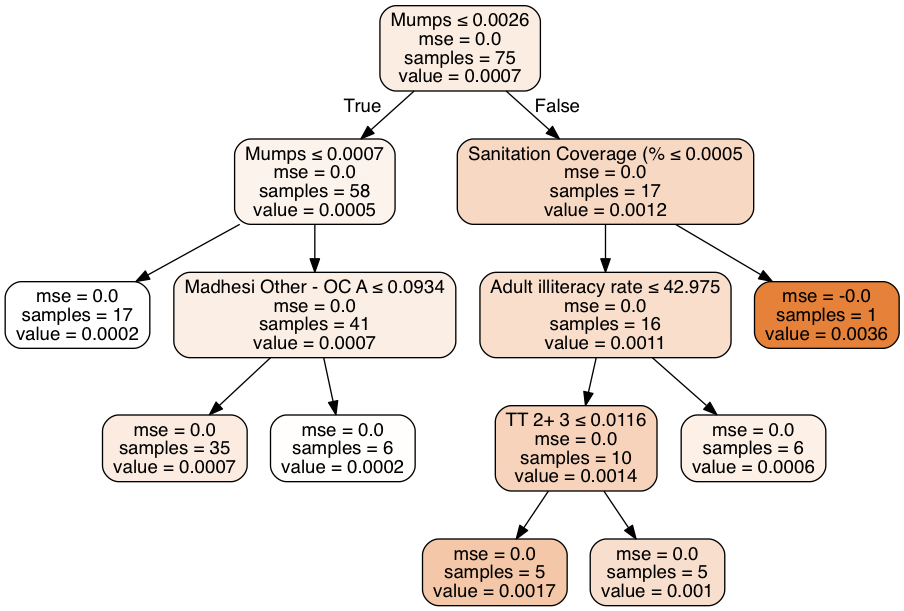

In [33]:
feature_cols = map(lambda x: x[0], filter(lambda x: x[1] > 0., features))
X_featureselection = X[feature_cols]
X_newfeatures = X[feature_cols]

param_grid = {'max_depth' : range(2, 20)}
dt_revmodel = GridSearchCV(tree.DecisionTreeRegressor(random_state=345), param_grid)
dt_revmodel = dt_revmodel.fit(X_newfeatures,Y)
print("Best parameters found by grid search:")
print(dt_revmodel.best_params_)
print("Best DT score:")
print(dt_revmodel.best_score_)

dot_data = tree.export_graphviz(dt_revmodel.best_estimator_,feature_names=X_newfeatures.columns, out_file=None, filled=True, rounded=True, special_characters=True,)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=500)

## Mumps

### Decision Tree 

In [34]:
X = data.iloc[:,range (50) + range(52,63)].drop(drop_cols, axis=1) #all columns 
Y_MPS = data['Mumps'] #target

Best parameters found by grid search:
{'max_depth': 2}
Best DT score:
-0.152830290544


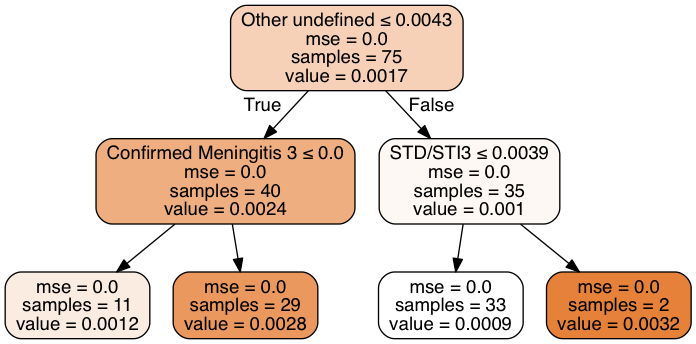

In [35]:
# GridSearchCV https://www.kaggle.com/kernels/diff/20421/25338 
param_grid = {'max_depth' : range(2, 20)}
dt_model = GridSearchCV(tree.DecisionTreeRegressor(random_state=345), param_grid)
dt_model = dt_model.fit(X,Y_MPS)
print("Best parameters found by grid search:")
print(dt_model.best_params_)
print("Best DT score:")
print(dt_model.best_score_)

dot_data = tree.export_graphviz(dt_model.best_estimator_,feature_names=X.columns, out_file=None, filled=True, rounded=True, special_characters=True,)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=500)

### Random Forest Model

In [36]:
rf = RandomForestRegressor(random_state=345)
rf_model = rf.fit(X,Y_MPS)
pred = rf_model.predict(X)
score = rf_model.score(X, Y_MPS)
print score

features_MPS = filter(lambda x: x[1] > 0, sorted(zip(X.columns, rf_model.feature_importances_), 
                                             key=lambda x: x[1], reverse=True))
feature_cols_mps = map(lambda x: x[0], features_MPS)
features

0.867779659907


[('Mumps', 0.18102990236647024),
 ('Sanitation Coverage (%', 0.15307646146397128),
 ('Children <5 years malnourished', 0.13129191335085003),
 ('Madhesi Other - OC A', 0.10475772126478249),
 ('Anxiety (Neurosis', 0.074740130709054081),
 ('Hepatatis-B', 0.058501499503994615),
 ('Mtn/Hill Janajati A', 0.050312680378081939),
 ('Madhesi Dalit', 0.037900064349358761),
 ('Adult illiteracy rate', 0.036598012513054182),
 ('Tuberculosis', 0.026830498821945058),
 ('Epilesy', 0.02186433150147182),
 ('Without safe water', 0.020908551232067942),
 ('Madhesi Brahman/Chhetree', 0.01621735043048737),
 ('HDI ', 0.014033701783427582),
 ('STD/STI3', 0.013511288628556625),
 ('Alcoholism', 0.013117773847061882),
 ('TT23', 0.012577643604533204),
 ('Measles', 0.012344246501155983),
 ('Mtn/Hill Janajati B', 0.0057694546238764837),
 ('DPT-HepB 1 3', 0.0041210581040410556),
 ('Measles 12-23 3', 0.0039354968558624566),
 ('Tetanus', 0.0036810368777234737),
 ('TT 2+ 3', 0.002879181288171512)]

### Modified Decision Tree 

Best parameters found by grid search:
{'max_depth': 2}
Best DT score:
-0.0189185396356


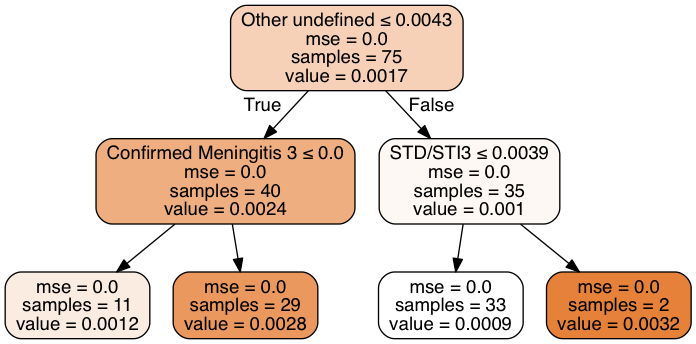

In [38]:
feature_cols = map(lambda x: x[0], filter(lambda x: x[1] > 0., features))
X_featureselection = X[feature_cols_mps]
X_newfeatures = X[feature_cols_mps]

param_grid = {'max_depth' : range(2, 20)}
dt_revmodel = GridSearchCV(tree.DecisionTreeRegressor(random_state=345), param_grid)
dt_revmodel = dt_revmodel.fit(X_newfeatures,Y_MPS)
print("Best parameters found by grid search:")
print(dt_revmodel.best_params_)
print("Best DT score:")
print(dt_revmodel.best_score_)

dot_data = tree.export_graphviz(dt_revmodel.best_estimator_,feature_names=X_newfeatures.columns, out_file=None, filled=True, rounded=True, special_characters=True,)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=500)